In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('nasik_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Eth-Benzene,MP-Xylene,O,WS,WD,SR,date,day,month,year
0,Nasik,69.82,112.90,29.52,69.90,60.61,18.84,11.29,1.79,57.32,...,9.01,25.81,NaN,1.96,165.97,623.42,2019-01-01,1,1,2019
1,Nasik,56.98,115.25,35.29,62.18,61.86,22.69,7.15,1.55,63.86,...,8.70,23.53,NaN,1.56,200.62,610.37,2019-02-01,2,1,2019
2,Nasik,62.25,102.40,21.63,64.80,52.68,24.03,9.56,1.50,50.19,...,8.13,22.68,NaN,1.70,170.23,586.97,2019-03-01,3,1,2019
3,Nasik,49.27,99.75,18.97,65.31,49.83,35.75,10.81,1.40,64.64,...,7.51,20.52,NaN,1.84,161.11,618.10,2019-04-01,4,1,2019
4,Nasik,43.93,83.52,14.01,51.42,39.85,37.71,10.77,1.23,64.95,...,4.78,13.85,NaN,1.77,194.58,521.27,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','O']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1517 non-null   float64       
 1   PM10         1521 non-null   float64       
 2   NO           1463 non-null   float64       
 3   NO2          1454 non-null   float64       
 4   NOx          1465 non-null   float64       
 5   NH3          1426 non-null   float64       
 6   SO2          1524 non-null   float64       
 7   CO           1526 non-null   float64       
 8   Ozone        1520 non-null   float64       
 9   Benzene      1514 non-null   float64       
 10  Toluene      1514 non-null   float64       
 11  Eth-Benzene  1509 non-null   float64       
 12  MP-Xylene    1464 non-null   float64       
 13  WS           1513 non-null   float64       
 14  WD           1513 non-null   float64       
 15  SR           1438 non-null   float64       
 16  date  

In [6]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Toluene        0
Eth-Benzene    0
MP-Xylene      0
WS             0
WD             0
SR             0
date           0
day            0
month          0
year           0
dtype: int64

In [7]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Toluene        False
Eth-Benzene    False
MP-Xylene      False
WS             False
WD             False
SR             False
date           False
day            False
month          False
year           False
dtype: bool

In [8]:
data.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,WS,WD,SR,date,day,month,year
0,69.82,112.90,29.52,69.90,60.61,18.84,11.29,1.79,57.32,12.65,48.62,9.01,25.81,1.96,165.97,623.42,2019-01-01,1,1,2019
1,56.98,115.25,35.29,62.18,61.86,22.69,7.15,1.55,63.86,9.89,43.00,8.70,23.53,1.56,200.62,610.37,2019-02-01,2,1,2019
2,62.25,102.40,21.63,64.80,52.68,24.03,9.56,1.50,50.19,10.44,41.86,8.13,22.68,1.70,170.23,586.97,2019-03-01,3,1,2019
3,49.27,99.75,18.97,65.31,49.83,35.75,10.81,1.40,64.64,10.15,38.43,7.51,20.52,1.84,161.11,618.10,2019-04-01,4,1,2019
4,43.93,83.52,14.01,51.42,39.85,37.71,10.77,1.23,64.95,7.60,27.04,4.78,13.85,1.77,194.58,521.27,2019-05-01,5,1,2019


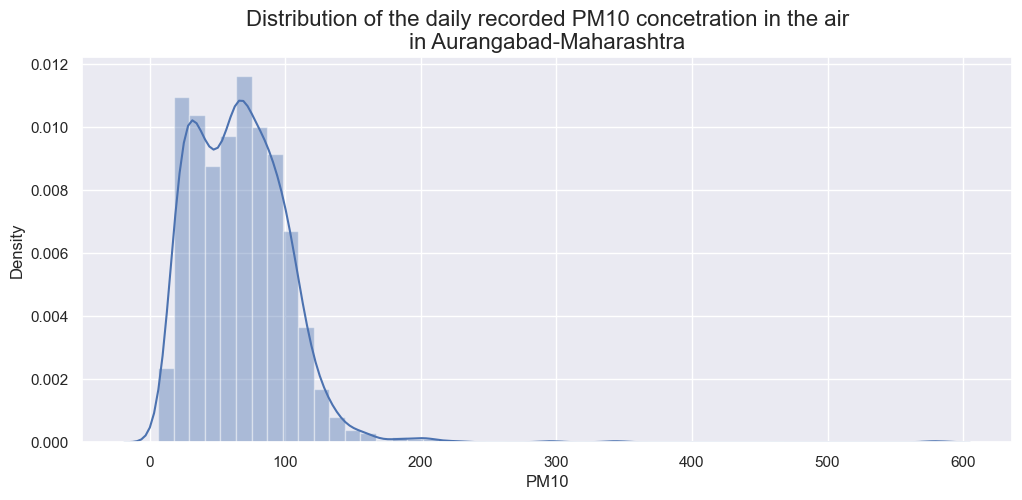

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM10'],bins=50)
plt.title('Distribution of the daily recorded PM10 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [10]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM10']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM10'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM10']

# display the resulting DataFrame
print(monthly_average)

       median_PM10
month             
1             90.6
2             84.9
3             78.6
4             66.1
5             61.0
6             34.9
7             28.0
8             29.3
9             32.4
10            50.6
11            96.3
12            93.2


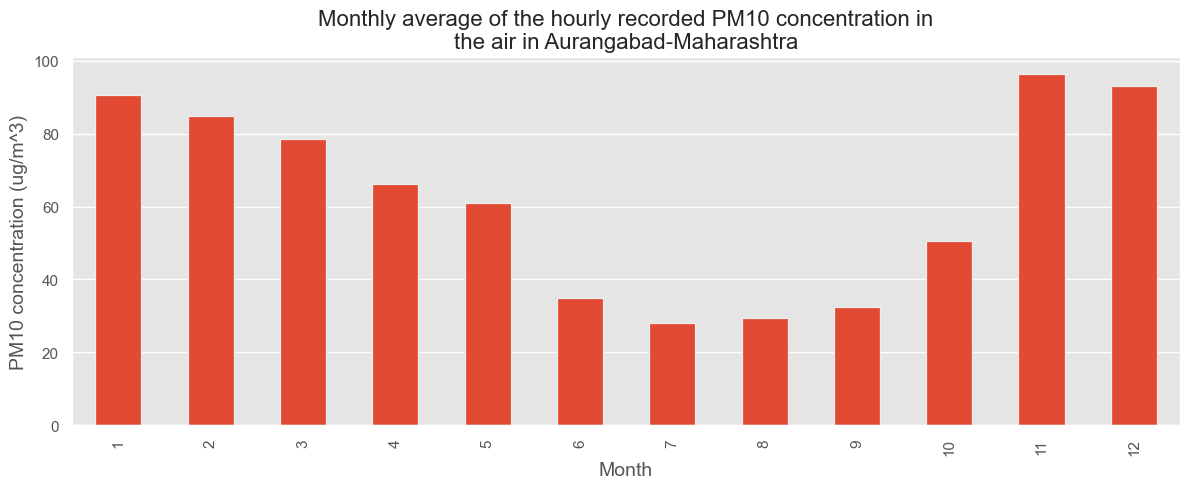

In [11]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM10 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

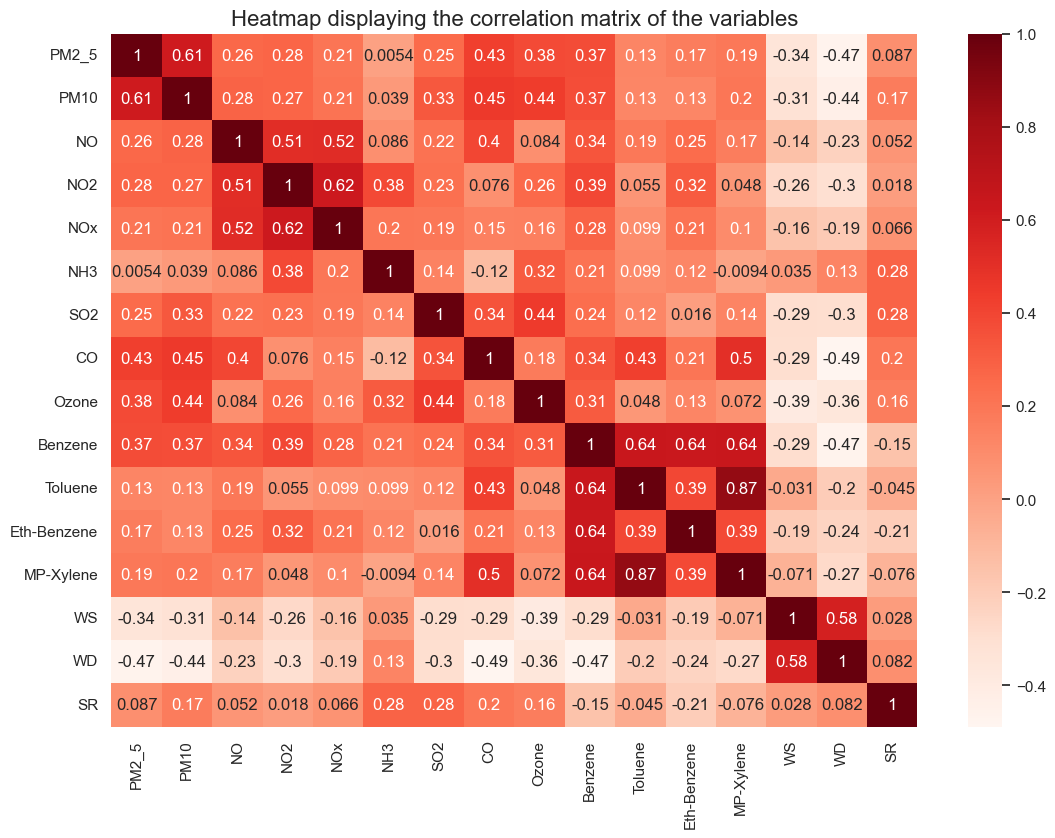

In [12]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','Eth-Benzene','MP-Xylene','WS','WD','SR',]]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [13]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          85.659599
PM2_5           1.866363
PM10            2.019442
NO              1.946002
NO2             2.578995
NOx             1.802845
NH3             1.816680
SO2             1.513458
CO              2.679537
Ozone           1.847004
Benzene         4.220566
Toluene         4.707780
Eth-Benzene     1.879535
MP-Xylene       4.932916
WS              1.692844
WD              2.436075
SR              1.475619
dtype: float64

In [14]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,WS,WD,SR
0,69.82,112.90,29.52,69.90,60.61,18.84,11.29,1.79,57.32,12.65,48.62,9.01,25.81,1.96,165.97,623.42
1,56.98,115.25,35.29,62.18,61.86,22.69,7.15,1.55,63.86,9.89,43.00,8.70,23.53,1.56,200.62,610.37
2,62.25,102.40,21.63,64.80,52.68,24.03,9.56,1.50,50.19,10.44,41.86,8.13,22.68,1.70,170.23,586.97
3,49.27,99.75,18.97,65.31,49.83,35.75,10.81,1.40,64.64,10.15,38.43,7.51,20.52,1.84,161.11,618.10
4,43.93,83.52,14.01,51.42,39.85,37.71,10.77,1.23,64.95,7.60,27.04,4.78,13.85,1.77,194.58,521.27


In [15]:
columns_to_drop = ['WS','WD','SR']
newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          10.780951
PM2_5           1.846801
PM10            1.988025
NO              1.879980
NO2             2.379099
NOx             1.793357
NH3             1.431473
SO2             1.449316
CO              2.191771
Ozone           1.709644
Benzene         3.668383
Toluene         4.675618
Eth-Benzene     1.833240
MP-Xylene       4.861061
dtype: float64

In [16]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM10'] = np.log(newdata['PM10'])

In [17]:
mul_reg = formula.ols(formula="PM10 ~ PM2_5  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone +  Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     188.4
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.61e-291
Time:                        11:52:07   Log-Likelihood:                -625.15
No. Observations:                1551   AIC:                             1276.
Df Residuals:                    1538   BIC:                             1346.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1297      0.030    104.689      0.000       3.071       3.188
PM2_5           0.0084      0.000     18.057      0.000       0.008       0.009
NO             -0.0022      0.002     -1.031      0.303      -0.006       0.002
NO2             0.0039      0.001      3.752      0.000       0.002       0.006
NOx             0.0004      0.001      0.477      0.633      -0.001       0.002
NH3            -0.0050      0.001     -4.380      0.000      -0.007      -0.003
SO2             0.0078      0.004      2.083      0.037       0.000       0.015
CO              0.3231      0.039      8.303      0.000       0.247       0.399
Ozone           0.0089      0.001     14.827      0.000       0.008       0.010
Benzene         0.0618      0.008      7.707      0.000       0.046       0.078
Toluene        -0.0130      0.002     -5.585      0.000      -0.018      -0.008
Eth_Benzene    -0.0232      0.004     -5.272      0.000      -0.032      -0.015
MP_Xylene       0.0044      0.003      1.304      0.192      -0.002       0.011
==============================================================================
Omnibus:                      578.197   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22038.582
Skew:                          -1.042   Prob(JB):                         0.00
Kurtosis:                      21.349   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM10',axis=1)
y = newdata['PM10']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM2_5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,1.321261,4.296336,3.563012,2.852921,0.728021,2.573441,3.484700,0.793173,4.881182,4.733847,2.568333,3.655199
1,0.804973,5.282445,2.998254,2.930946,1.123296,1.178685,2.783725,1.126395,3.612596,4.073879,2.458461,3.276281
2,1.016876,2.947913,3.189921,2.357932,1.260872,1.990608,2.637689,0.429889,3.865394,3.940006,2.256437,3.135017
3,0.494959,2.493311,3.227230,2.180035,2.464150,2.411730,2.345616,1.166137,3.732101,3.537214,2.036693,2.776042
4,0.280242,1.645633,2.211104,1.557085,2.665381,2.398255,1.849092,1.181932,2.560038,2.199663,1.069108,1.667540


In [19]:
y.head()

0    4.726502
1    4.747104
2    4.628887
3    4.602667
4    4.425086
Name: PM10, dtype: float64

In [20]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.6829514167991041

Score on test data: -0.2168312567179993


In [22]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.3522672935341861

Overall model accuracy: -0.2168312567179993


In [23]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM10',axis=1)
y = ensemble_data['PM10']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [25]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.784346471765813

Score on test data: 0.46037054215763806

Root Mean Squared Error: 28.78787198723815

Overall model accuracy: 0.46037054215763806


In [27]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [28]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.7522321845525518

Score on test data: 0.45731195319801443

Best parameters found:


{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 2}

Root Mean Squared Error: 28.869340717787193

Overall model accuracy: 0.45731195319801443


In [29]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree_10.xlsx')

In [30]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [31]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8253407316533263

Score on test data: 0.4994780600966767

Root Mean Squared Error: 27.72511126398856

Overall model accuracy: 0.4994780600966767


In [32]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.8008278417821693

Score on test data: 0.507900485769912

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 7}

Root Mean Squared Error: 27.490852413915366

Overall model accuracy: 0.507900485769912


In [34]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest_10.xlsx')

In [35]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9882006554903705

Score on test data: 0.4616507704454066

Root Mean Squared Error: 28.75370323271818

Overall model accuracy: 0.4616507704454066


In [37]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [38]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9297830604629451

Score on test data: 0.49450613698357526

Best parameters found:


{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 3,
 'learning_rate': 0.1}

Root Mean Squared Error: 27.862474359392806

Overall model accuracy: 0.49450613698357526


In [39]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost_10.xlsx')

In [40]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1551 1551
